## SalesForecasting

Think: “What will sales look like in the future?”

Prepare time series: aggregate daily/weekly sales.

Use Facebook Prophet or ARIMA for forecasting.

Predict next 3 months sales.

Plot graphs (actual vs forecast).

## Imports

In [1]:
!pip install prophet


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet  # Facebook Prophet for forecasting

%matplotlib inline


## Load & Prepare Data

Daily sales

In [6]:
# Load dataset
data = pd.read_csv("../data/OnlineRetailDataSet.csv", encoding="utf-8-sig", parse_dates=["InvoiceDate"])

# Ensure datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

# Compute daily sales
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum().reset_index()

# Prophet requires columns named ds (date) and y (value)
daily_sales = daily_sales.rename(columns={'InvoiceDate':'ds', 'TotalPrice':'y'})
daily_sales.head()


,ds,y
0,2010-01-12,58635.56
1,2010-02-12,46207.28
2,2010-03-12,45620.46
3,2010-05-12,31383.95
4,2010-06-12,53860.18


## Plot Daily Sales

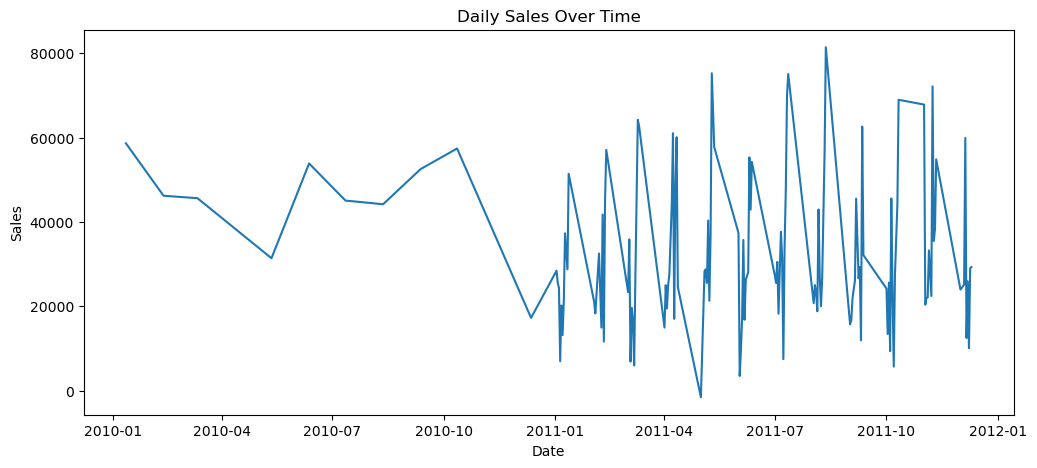

In [7]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['ds'], daily_sales['y'])
plt.title("Daily Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.savefig("../visuals/daily_sales.png", dpi=150)
plt.show()


## Load & Prepare Data

Monthly sales

In [22]:
# Step 1: Aggregate sales by month
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().reset_index()

# Step 2: Convert period to timestamp (Prophet requires datetime type)
monthly_sales['ds'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

# Step 3: Rename columns for Prophet
monthly_sales['y'] = monthly_sales['TotalPrice']

# Step 4: Keep only needed columns for Prophet
monthly_sales = monthly_sales[['ds','y']]

# Step 5: Check the result
print(monthly_sales.head())


          ds         y
0 2010-01-01  58635.56
1 2010-02-01  46207.28
2 2010-03-01  45620.46
3 2010-05-01  31383.95
4 2010-06-01  53860.18


## Plot monthly sales

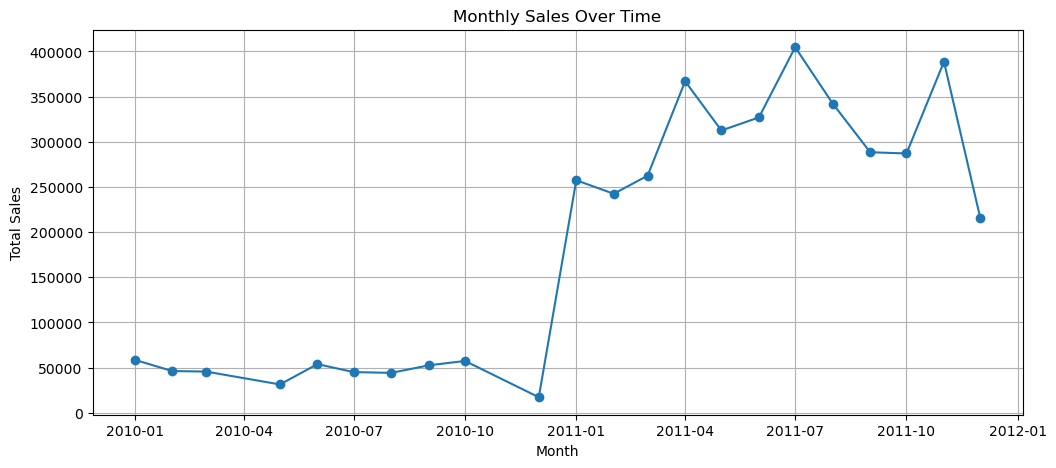

In [32]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['ds'], monthly_sales['y'], marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.savefig("../visuals/monthly_sales.png", dpi=150)
plt.show()


## Train Prophet Model

In [8]:
model = Prophet()
model.fit(daily_sales)


02:00:49 - cmdstanpy - INFO - Chain [1] start processing
02:00:49 - cmdstanpy - INFO - Chain [1] done processing


In [25]:

model = Prophet()
model.fit(monthly_sales)  # monthly_sales has ds and y columns


15:23:30 - cmdstanpy - INFO - Chain [1] start processing
15:23:30 - cmdstanpy - INFO - Chain [1] done processing


## Forecast Future Sales

In [28]:
# Forecast for next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
107,2012-02-25,418121.173548,326978.381423,516660.839039
108,2012-02-26,418664.995582,324042.117929,518729.915113
109,2012-02-27,419208.817616,325676.741828,517222.025351
110,2012-02-28,419752.639649,326728.005355,512867.244964
111,2012-02-29,420296.461683,319689.125561,515294.108627


## Plot Forecast Results

In [19]:
%matplotlib notebook


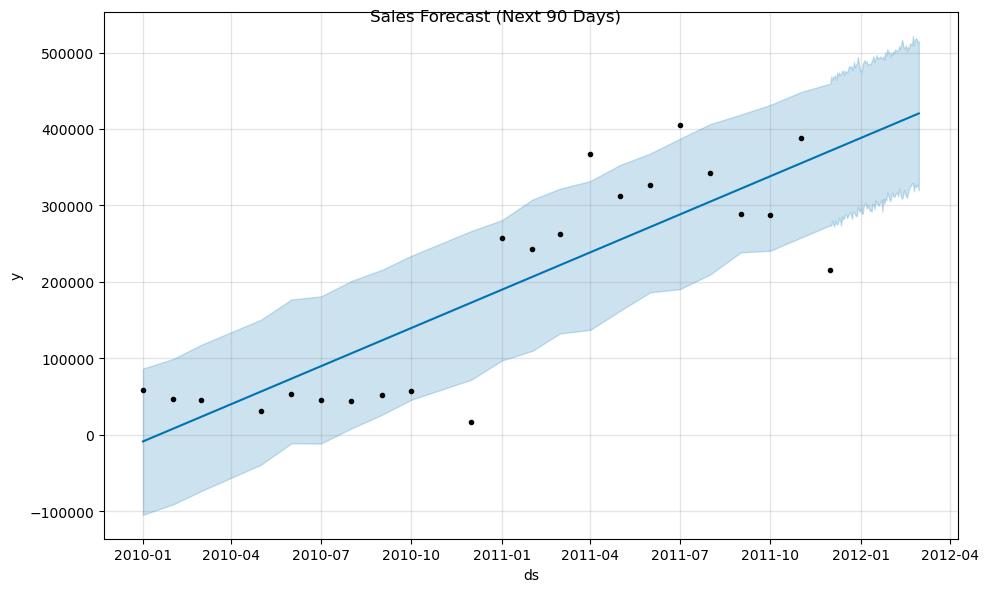

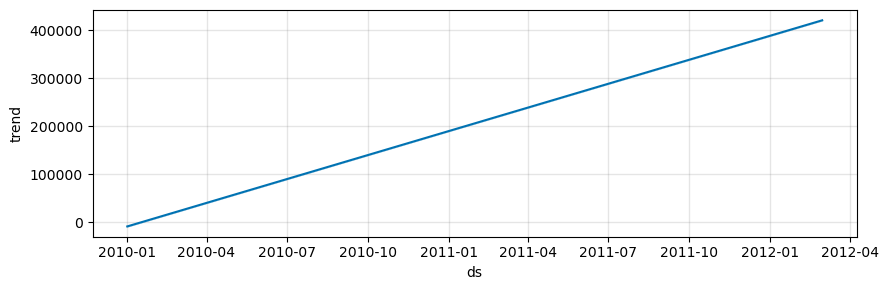

,ds,yhat,yhat_lower,yhat_upper
107,2012-02-25,418121.173548,326978.381423,516660.839039
108,2012-02-26,418664.995582,324042.117929,518729.915113
109,2012-02-27,419208.817616,325676.741828,517222.025351
110,2012-02-28,419752.639649,326728.005355,512867.244964
111,2012-02-29,420296.461683,319689.125561,515294.108627


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

# Forecast plot
fig1 = model.plot(forecast)
fig1.suptitle("Sales Forecast (Next 90 Days)")
plt.show()  # display
fig1.savefig("../visuals/sales_forecast.png", dpi=150)
plt.close(fig1)

# Components plot
fig2 = model.plot_components(forecast)
plt.show()
fig2.savefig("../visuals/sales_forecast_components.png", dpi=150)
plt.close(fig2)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
